In [163]:
#imports
# from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
import acquire as a
import prepare as p
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = a.get_curriculum_logs_data()

In [3]:
df.shape

(847330, 14)

In [4]:
df.head()

,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 847330 entries, 2018-01-26 to 2021-04-21
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        847330 non-null  object 
 1   path        847329 non-null  object 
 2   user_id     847330 non-null  int64  
 3   cohort_id   847330 non-null  float64
 4   ip          847330 non-null  object 
 5   id          847330 non-null  int64  
 6   name        847330 non-null  object 
 7   slack       847330 non-null  object 
 8   start_date  847330 non-null  object 
 9   end_date    847330 non-null  object 
 10  created_at  847330 non-null  object 
 11  updated_at  847330 non-null  object 
 12  deleted_at  0 non-null       float64
 13  program_id  847330 non-null  int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 97.0+ MB


# Prepare

 - change date to datetime object
 - set date as index
 - change start date and end date to datetime
 - rename path to endpoint
 - drop id column
 - rename name to cohort
 - maybe combine date and time? 

In [6]:
df.index = pd.to_datetime(df.index)

In [7]:
df.head()

,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2


In [8]:
df.index

DatetimeIndex(['2018-01-26', '2018-01-26', '2018-01-26', '2018-01-26',
               '2018-01-26', '2018-01-26', '2018-01-26', '2018-01-26',
               '2018-01-26', '2018-01-26',
               ...
               '2021-04-21', '2021-04-21', '2021-04-21', '2021-04-21',
               '2021-04-21', '2021-04-21', '2021-04-21', '2021-04-21',
               '2021-04-21', '2021-04-21'],
              dtype='datetime64[ns]', name='date', length=847330, freq=None)

In [9]:
df.head()

,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2


In [10]:
df.start_date = pd.to_datetime(df.start_date)
df.end_date = pd.to_datetime(df.end_date)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847330 entries, 2018-01-26 to 2021-04-21
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time        847330 non-null  object        
 1   path        847329 non-null  object        
 2   user_id     847330 non-null  int64         
 3   cohort_id   847330 non-null  float64       
 4   ip          847330 non-null  object        
 5   id          847330 non-null  int64         
 6   name        847330 non-null  object        
 7   slack       847330 non-null  object        
 8   start_date  847330 non-null  datetime64[ns]
 9   end_date    847330 non-null  datetime64[ns]
 10  created_at  847330 non-null  object        
 11  updated_at  847330 non-null  object        
 12  deleted_at  0 non-null       float64       
 13  program_id  847330 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(7)
memory usage: 97.0+ MB


In [12]:
df = df.rename(columns={'path':'endpoint',
                       'name':'cohort'})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847330 entries, 2018-01-26 to 2021-04-21
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time        847330 non-null  object        
 1   endpoint    847329 non-null  object        
 2   user_id     847330 non-null  int64         
 3   cohort_id   847330 non-null  float64       
 4   ip          847330 non-null  object        
 5   id          847330 non-null  int64         
 6   cohort      847330 non-null  object        
 7   slack       847330 non-null  object        
 8   start_date  847330 non-null  datetime64[ns]
 9   end_date    847330 non-null  datetime64[ns]
 10  created_at  847330 non-null  object        
 11  updated_at  847330 non-null  object        
 12  deleted_at  0 non-null       float64       
 13  program_id  847330 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(7)
memory usage: 97.0+ MB


In [14]:
df = df.drop(columns=['id'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847330 entries, 2018-01-26 to 2021-04-21
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time        847330 non-null  object        
 1   endpoint    847329 non-null  object        
 2   user_id     847330 non-null  int64         
 3   cohort_id   847330 non-null  float64       
 4   ip          847330 non-null  object        
 5   cohort      847330 non-null  object        
 6   slack       847330 non-null  object        
 7   start_date  847330 non-null  datetime64[ns]
 8   end_date    847330 non-null  datetime64[ns]
 9   created_at  847330 non-null  object        
 10  updated_at  847330 non-null  object        
 11  deleted_at  0 non-null       float64       
 12  program_id  847330 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(7)
memory usage: 90.5+ MB


# Test the Prep

In [3]:
df = p.prep_logs(df)

There are 3765 duplicate rows in your dataset - these will be dropped.
----------------


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847330 entries, 2018-01-26 to 2021-04-21
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time        847330 non-null  object        
 1   endpoint    847329 non-null  object        
 2   user_id     847330 non-null  int64         
 3   cohort_id   847330 non-null  float64       
 4   ip          847330 non-null  object        
 5   cohort      847330 non-null  object        
 6   slack       847330 non-null  object        
 7   start_date  847330 non-null  datetime64[ns]
 8   end_date    847330 non-null  datetime64[ns]
 9   created_at  847330 non-null  object        
 10  updated_at  847330 non-null  object        
 11  deleted_at  0 non-null       float64       
 12  program_id  847330 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(7)
memory usage: 90.5+ MB


In [5]:
df.head(2)

,time,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1


In [7]:
df.duplicated().sum()

3777

In [8]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [5]:
df.duplicated().sum()

0

In [6]:
df.head()

,time,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2


# Question 1: 
 -  Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [10]:
# set to display all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
df.groupby('program_id').endpoint.value_counts()

program_id  endpoint                                                                                                                                                                                                                                                                                                              
1           /                                                                                                                                                                                                                                                                                                                          1680
            index.html                                                                                                                                                                                                                                                                                                                 1006
            j

In [15]:
df.dtypes

time                  object
endpoint              object
user_id                int64
cohort_id            float64
ip                    object
cohort                object
slack                 object
start_date    datetime64[ns]
end_date      datetime64[ns]
created_at            object
updated_at            object
deleted_at           float64
program_id             int64
dtype: object

In [18]:
#page_views = df.groupby(['program_id']['endpoint'].agg(['count','nunique']))

TypeError: list indices must be integers or slices, not str

In [21]:
#tells us how many unique endpoints are in each program type
df.groupby(['program_id'])['endpoint'].nunique()

program_id
1     710
2    1913
3     682
4       4
Name: endpoint, dtype: int64

In [ ]:
df['accessed_after'] = df.index > df.end_date
df['accessed_after'] = df['accessed_after'].astype(int)

In [ ]:
#df[df.accessed_after == 1]

In [24]:
#df.groupby('program_id')[(df.accessed_after==1)]

In [5]:
df

,time,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,accessed_after
date,,,,,,,,,,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,1
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,1
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,1
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,1
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2,1
2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2,1
2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2,1


In [10]:
df.groupby(by=["program_id"]).sum()

,user_id,cohort_id,deleted_at,accessed_after
program_id,,,,
1,3543178,311884.0,0.0,30432
2,315411592,33528877.0,0.0,157138
3,66174226,7063435.0,0.0,11385
4,760,45.0,0.0,5


In [11]:
php = df.loc[df.program_id==1]

In [38]:
php.endpoint.value_counts()[0:20]

/                                                                            1680
index.html                                                                   1006
javascript-i                                                                  735
html-css                                                                      540
spring                                                                        496
java-iii                                                                      474
java-ii                                                                       449
java-i                                                                        440
javascript-ii                                                                 426
appendix                                                                      407
jquery                                                                        343
mysql                                                                         280
content/html-css

In [13]:
web_dev = df.loc[df.program_id==2]

In [45]:
web_dev.endpoint.value_counts()[0:20]

/                                                                            35701
javascript-i                                                                 17392
toc                                                                          17320
search/search_index.json                                                     15164
java-iii                                                                     12621
html-css                                                                     12522
java-ii                                                                      11658
spring                                                                       11305
jquery                                                                       10662
mysql                                                                        10250
java-i                                                                        9974
javascript-ii                                                                 9816
appe

In [14]:
ds = df.loc[df.program_id==3]

In [44]:
ds.endpoint.value_counts()[0:20]

/                                                    8235
search/search_index.json                             2187
classification/overview                              1783
1-fundamentals/1.1-intro-to-data-science             1632
1-fundamentals/modern-data-scientist.jpg             1613
1-fundamentals/AI-ML-DL-timeline.jpg                 1607
classification/scale_features_or_not.svg             1531
sql/mysql-overview                                   1420
fundamentals/intro-to-data-science                   1411
fundamentals/AI-ML-DL-timeline.jpg                   1407
fundamentals/modern-data-scientist.jpg               1405
6-regression/1-overview                              1121
anomaly-detection/AnomalyDetectionCartoon.jpeg        807
anomaly-detection/overview                            803
10-anomaly-detection/1-overview                       749
10-anomaly-detection/AnomalyDetectionCartoon.jpeg     748
3-sql/1-mysql-overview                                705
1-fundamentals

In [116]:
ds_cohort_df = pd.DataFrame(ds[ds.endpoint != '/'].groupby('cohort')['endpoint'].value_counts())
ds_cohort_df

endpoint
cohort   endpoint                                          
Bayes    1-fundamentals/modern-data-scientist.jpg       644
         1-fundamentals/AI-ML-DL-timeline.jpg           642
         1-fundamentals/1.1-intro-to-data-science       640
         search/search_index.json                       584
         6-regression/1-overview                        520
...                                                     ...
Florence stats/simulation                                 1
         storytelling/creating-charts                     1
         storytelling/overview                            1
         timeseries/modeling-lesson2                      1
         where                                            1

[1758 rows x 1 columns]

In [117]:
cep_df = ds_cohort_df.loc[['Bayes']]

In [122]:
cep_df.endpoint.nlargest(3)

cohort  endpoint                                
Bayes   1-fundamentals/modern-data-scientist.jpg    644
        1-fundamentals/AI-ML-DL-timeline.jpg        642
        1-fundamentals/1.1-intro-to-data-science    640
Name: endpoint, dtype: int64

In [93]:
cep_df

count                                            endpoint
cohort endpoint                                          
Bayes  /                                             1963
       1-fundamentals/modern-data-scientist.jpg       644

In [147]:
(df.cohort=='Everglades').sum()

1

In [142]:
df_cohort_list = list(df.cohort.value_counts().index)

In [155]:
cohort_df = pd.DataFrame(df[(df.endpoint != '/')].groupby('cohort')['endpoint'].value_counts())

In [160]:
cohort_df[['endpoint']].nlargest(3, columns=cohort_df[['endpoint']])

,,endpoint
cohort,endpoint,
Jupiter,toc,1861
Staff,javascript-i,1807
Apex,search/search_index.json,1494


In [154]:
#ds_df = pd.DataFrame()
for cohort in df_cohort_list:
    if cohort != 'Everglades':
        
        cohort_df = pd.DataFrame(df[(df.endpoint != '/')].groupby('cohort')['endpoint'].value_counts())
        cep_df = cohort_df.loc[[cohort]]
        cep_df = cep_df.endpoint.nlargest(3)
        #ds_df.append(cep_df)
        print(cep_df)
        print('\n')

cohort  endpoint    
Staff   javascript-i    1807
        spring          1394
        java-iii        1387
Name: endpoint, dtype: int64


cohort  endpoint                
Ceres   search/search_index.json    1377
        javascript-i                 999
        toc                          908
Name: endpoint, dtype: int64


cohort  endpoint    
Zion    toc             1463
        javascript-i     895
        java-iii         752
Name: endpoint, dtype: int64


cohort   endpoint                
Jupiter  toc                         1861
         search/search_index.json     995
         javascript-i                 920
Name: endpoint, dtype: int64


cohort   endpoint                
Fortuna  toc                         1228
         search/search_index.json    1018
         javascript-i                 776
Name: endpoint, dtype: int64


cohort     endpoint    
Voyageurs  javascript-i    881
           java-iii        770
           java-ii         753
Name: endpoint, dtype: int64


cohor

In [153]:
ds_df

""


In [141]:
# ds_df = pd.DataFrame()
for cohort in ds_cohort_list:
    cep_df = ds_cohort_df.loc[[cohort]]
    cep_df = cep_df.endpoint.nlargest(3)
    print(cep_df)
    print('\n')

cohort  endpoint                                
Darden  classification/overview                     1108
        classification/scale_features_or_not.svg     907
        sql/mysql-overview                           770
Name: endpoint, dtype: int64


cohort  endpoint                                
Bayes   1-fundamentals/modern-data-scientist.jpg    644
        1-fundamentals/AI-ML-DL-timeline.jpg        642
        1-fundamentals/1.1-intro-to-data-science    640
Name: endpoint, dtype: int64


cohort  endpoint                                
Curie   6-regression/1-overview                     593
        search/search_index.json                    534
        1-fundamentals/1.1-intro-to-data-science    460
Name: endpoint, dtype: int64


cohort  endpoint                                                     
Easley  classification/scale_features_or_not.svg                         448
        classification/overview                                          444
        classification/classi

In [56]:
df.index.min()
df.index.max()

Timestamp('2021-04-21 00:00:00')

In [42]:
ds[ds.endpoint=='sql/mysql-overview']

,time,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,accessed_after
date,,,,,,,,,,,,,,
2020-07-22,18:13:08,sql/mysql-overview,698,59.0,24.28.145.253,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,NaN,3,0
2020-07-22,18:14:30,sql/mysql-overview,698,59.0,24.28.145.253,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,NaN,3,0
2020-07-23,05:52:47,sql/mysql-overview,586,55.0,67.10.169.6,Curie,#curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,NaN,3,1
2020-07-23,13:25:57,sql/mysql-overview,681,59.0,108.239.188.205,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,NaN,3,0
2020-07-23,15:43:05,sql/mysql-overview,581,55.0,70.112.179.142,Curie,#curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,NaN,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,10:36:27,sql/mysql-overview,910,137.0,69.232.101.215,Florence,#florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,NaN,3,0
2021-04-21,10:36:31,sql/mysql-overview,910,137.0,69.232.101.215,Florence,#florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,NaN,3,0
2021-04-21,10:41:28,sql/mysql-overview,835,133.0,173.173.109.5,Easley,#easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,NaN,3,0


In [15]:
front_end = df.loc[df.program_id==4]

In [46]:
front_end.endpoint.value_counts()[0:20]

content/html-css                               2
content/html-css/gitbook/images/favicon.ico    1
content/html-css/introduction.html             1
/                                              1
Name: endpoint, dtype: int64

In [47]:
df[df.program_id==4]

,time,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,accessed_after
date,,,,,,,,,,,,,,
2018-03-22,19:01:49,/,152,9.0,207.68.209.17,Apollo,#apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,4,1
2018-03-22,19:01:54,content/html-css,152,9.0,207.68.209.17,Apollo,#apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,4,1
2018-03-22,19:01:54,content/html-css/gitbook/images/favicon.ico,152,9.0,207.68.209.17,Apollo,#apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,4,1
2018-03-22,19:02:47,content/html-css,152,9.0,207.68.209.17,Apollo,#apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,4,1
2018-03-22,19:02:52,content/html-css/introduction.html,152,9.0,207.68.209.17,Apollo,#apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,4,1


In [32]:
#for php, the most highly trafficked lesson is javascript-i with 
php.groupby('endpoint').sum().sort_values('user_id')

,user_id,cohort_id,deleted_at,program_id,accessed_after
endpoint,,,,,
html-css/bootstrap-grid-system,1,8.0,0.0,1,1
student,1,8.0,0.0,1,1
spring/security,1,8.0,0.0,1,1
students/468/notes,1,8.0,0.0,1,1
student/create,1,8.0,0.0,1,1
...,...,...,...,...,...
java-i,51036,4373.0,0.0,440,440
html-css,57481,4697.0,0.0,540,540
index.html,61900,14061.0,0.0,1006,1006


In [23]:
df.dtypes

time                      object
endpoint                  object
user_id                    int64
cohort_id                float64
ip                        object
cohort                    object
slack                     object
start_date        datetime64[ns]
end_date          datetime64[ns]
created_at                object
updated_at                object
deleted_at               float64
program_id                 int64
accessed_after             int64
dtype: object

In [29]:
#make a df with value counts for requests by php program
php_requests = pd.DataFrame(df.endpoint.value_counts(dropna=False)).reset_index().\
                rename(index=str, columns={'index': 'endpoint', 'endpoint': 'endpoint_count'})

#make a df with the probability of each endpoint 
php_requests2 = pd.DataFrame(df.endpoint.value_counts(dropna=False)/df.endpoint.count()).reset_index().\
                rename(index=str, columns={'index': 'endpoint', 'endpoint': 'endpoint_proba'})

#merge the new dfs
php_requests = php_requests.merge(php_requests2)


# see those where rate < 1% 
php_requests[php_requests.endpoint_proba < .01]

,endpoint,endpoint_count,endpoint_proba
12,appendix,8024,0.009512
13,javascript-i/introduction/working-with-data-ty...,7292,0.008644
14,mysql/tables,7062,0.008372
15,javascript-i/functions,7047,0.008354
16,javascript-i/javascript-with-html,7025,0.008328
...,...,...,...
2220,job-board,1,0.000001
2221,11-distributed-ml/8.1-classification,1,0.000001
2222,quiz/submit/2186,1,0.000001
2223,further-reading/javascript/array-splice,1,0.000001


In [ ]:
php.endpoint_count()

2225
                                     endpoint  endpoint_count  endpoint_proba
2215                              10.00_Intro               1        0.000001
2216                          java-ii/file-op               1        0.000001
2217                 prework/cli/03-filepaths               1        0.000001
2218                                  quiz118               1        0.000001
2219                      9_Anomaly_Detection               1        0.000001
2220                                job-board               1        0.000001
2221     11-distributed-ml/8.1-classification               1        0.000001
2222                         quiz/submit/2186               1        0.000001
2223  further-reading/javascript/array-splice               1        0.000001
2224                                      NaN               1        0.000001


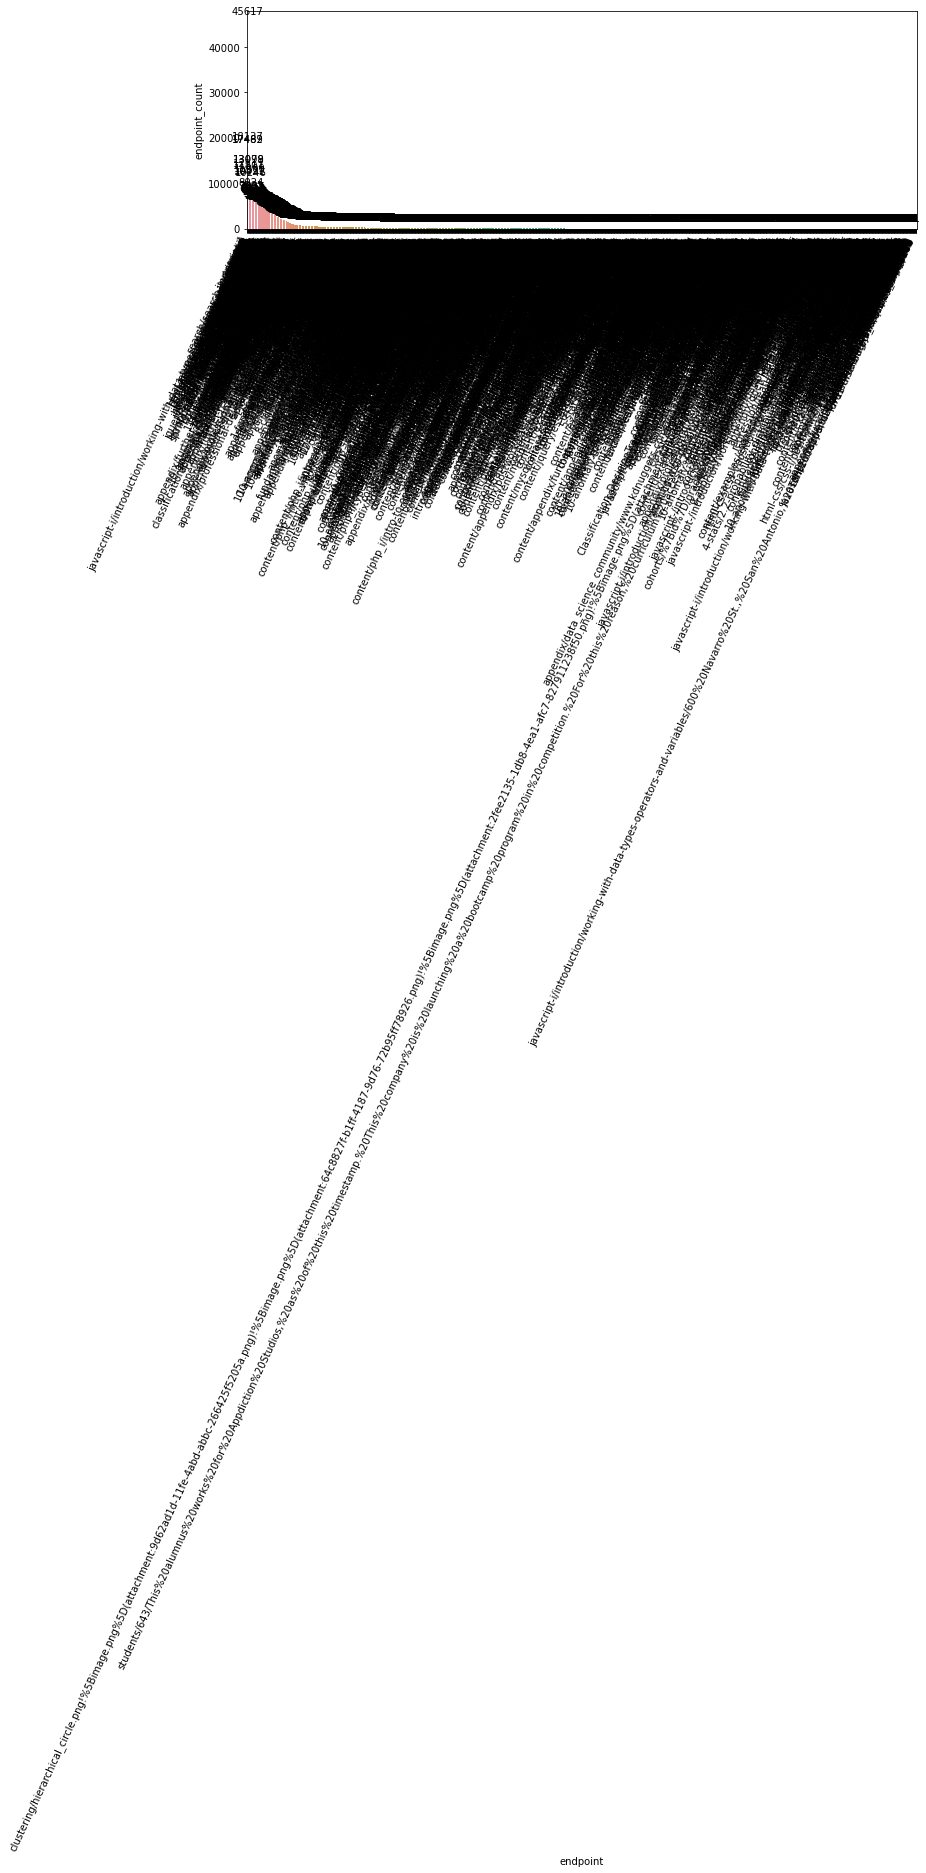

In [34]:
print(len(php_requests))

print(php_requests.tail(10))

#barplot of ip addresses and their counts
plt.figure(figsize=(12, 4))
splot = sns.barplot(data=php_requests, x = 'endpoint', y = 'endpoint_count', ci = None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), 
                   textcoords = 'offset points'
                   )
    plt.xticks(ha ='right',rotation=65)

# 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [161]:
df = a.get_curriculum_logs_data()

In [164]:
df = p.prep_logs(df)

There are 3765 duplicate rows in your dataset - these will be dropped.
----------------


In [168]:
df.head(1)

,time,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,accessed_after
date,,,,,,,,,,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,1


In [170]:
df_grads = df.loc[df.accessed_after==1]

In [171]:
df_grads

,time,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,accessed_after
date,,,,,,,,,,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,1
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,1
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,1
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,1
2018-01-26,10:14:47,/,11,1.0,97.105.19.61,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2,1
2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2,1
2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2,1


In [189]:
program_df = pd.DataFrame(df[(df.endpoint != '/')&(df.endpoint != 'toc')].groupby('program_id')['endpoint'].value_counts())

In [255]:
df_program_list = list(df.program_id.value_counts().index)

In [192]:
#ds_df = pd.DataFrame()
for program in df_program_list:     
        program_df = pd.DataFrame(df[(df.endpoint != '/')&(df.endpoint != 'toc')].groupby('program_id')['endpoint'].value_counts())
        access_df = program_df.loc[[program]]
        access_df = access_df.endpoint.nlargest(3)
        #ds_df.append(cep_df)
        print(access_df)
        print('----------------------------------------------')
        print('\n')

program_id  endpoint                
2           javascript-i                17392
            search/search_index.json    15164
            java-iii                    12621
Name: endpoint, dtype: int64
----------------------------------------------


program_id  endpoint                                
3           search/search_index.json                    2187
            classification/overview                     1783
            1-fundamentals/1.1-intro-to-data-science    1632
Name: endpoint, dtype: int64
----------------------------------------------


program_id  endpoint    
1           index.html      1006
            javascript-i     735
            html-css         540
Name: endpoint, dtype: int64
----------------------------------------------


program_id  endpoint                                   
4           content/html-css                               2
            content/html-css/gitbook/images/favicon.ico    1
            content/html-css/introduction.html       

In [193]:
df

,time,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,accessed_after
date,,,,,,,,,,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,1
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,1
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,1
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,1
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2,1
2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2,1
2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2,1


In [254]:
df_grads[df_grads.program_id==2]

,time,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,accessed_after
date,,,,,,,,,,,,,,
2018-01-26,10:59:02,index.html,21,16.0,71.137.146.71,Niagara,#niagara,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,NaN,2,1
2018-01-26,10:59:06,java-i,21,16.0,71.137.146.71,Niagara,#niagara,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,NaN,2,1
2018-01-26,11:36:27,/,26,18.0,97.105.19.61,Pinnacles,#pinnacles,2017-03-27,2017-07-20,2017-03-28 00:33:12,2017-03-28 00:33:12,NaN,2,1
2018-01-26,11:36:35,javascript-i,26,18.0,97.105.19.61,Pinnacles,#pinnacles,2017-03-27,2017-07-20,2017-03-28 00:33:12,2017-03-28 00:33:12,NaN,2,1
2018-01-26,11:36:38,javascript-i/functions,26,18.0,97.105.19.61,Pinnacles,#pinnacles,2017-03-27,2017-07-20,2017-03-28 00:33:12,2017-03-28 00:33:12,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2,1
2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2,1
2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2,1


In [256]:
#ds_df = pd.DataFrame()
for program in df_program_list:     
        program_df = pd.DataFrame(df_grads[(df_grads.endpoint != '/')&(df_grads.endpoint != 'toc')].groupby('program_id')['endpoint'].value_counts())
        access_df = program_df.loc[[program]]
        access_df = access_df.endpoint.nlargest(3)
        #ds_df.append(cep_df)
        print(access_df)
        print('----------------------------------------------')
        print('\n')

program_id  endpoint                
2           javascript-i                4207
            spring                      3740
            search/search_index.json    3551
Name: endpoint, dtype: int64
----------------------------------------------


program_id  endpoint                
3           search/search_index.json    493
            sql/mysql-overview          275
            classification/overview     266
Name: endpoint, dtype: int64
----------------------------------------------


program_id  endpoint    
1           index.html      1006
            javascript-i     735
            html-css         540
Name: endpoint, dtype: int64
----------------------------------------------


program_id  endpoint                                   
4           content/html-css                               2
            content/html-css/gitbook/images/favicon.ico    1
            content/html-css/introduction.html             1
Name: endpoint, dtype: int64
---------------------------------

In [194]:
df['program_name'] = 0

In [195]:
df['program_name'] = np.where(df['program_id']==1, 'Full Stack PHP', 0)

In [196]:
df

,time,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,accessed_after,program_name
date,,,,,,,,,,,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,1,Full Stack PHP
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,1,Full Stack PHP
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,1,Full Stack PHP
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,1,Full Stack PHP
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2,1,0
2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2,1,0
2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2,1,0


In [197]:
df['program_name'] = np.where(df['program_id']==2, 'Web Development', df['program_name'])

In [199]:
df['program_name'] = np.where(df['program_id']==3, 'Data Science', df['program_name'])

In [200]:
df['program_name'] = np.where(df['program_id']==4, 'Front End', df['program_name'])

In [201]:
df.program_name.value_counts()

Web Development    710307
Data Science       102821
Full Stack PHP      30432
Front End               5
Name: program_name, dtype: int64

In [202]:
program_df = pd.DataFrame(df[(df.endpoint != '/')&(df.endpoint != 'toc')].groupby('program_name')['endpoint'].value_counts())

In [257]:
df_program_list = list(df.program_name.value_counts().index)

In [261]:
df_grads = df.loc[df.accessed_after==1]

In [262]:
#ds_df = pd.DataFrame()
for program in df_program_list:     
        program_df = pd.DataFrame(df_grads[(df_grads.endpoint != '/')&(df_grads.endpoint != 'toc')&(df_grads.endpoint != 'search/search_index.json')].groupby('program_name')['endpoint'].value_counts())
        access_df = program_df.loc[[program]]
        access_df = access_df.endpoint.nlargest(3)
        print(access_df)
        print('----------------------------------------------')
        print('\n')

program_name     endpoint    
Web Development  javascript-i    4207
                 spring          3740
                 html-css        3118
Name: endpoint, dtype: int64
----------------------------------------------


program_name  endpoint                                
Data Science  sql/mysql-overview                          275
              classification/overview                     266
              classification/scale_features_or_not.svg    211
Name: endpoint, dtype: int64
----------------------------------------------


program_name    endpoint    
Full Stack PHP  index.html      1006
                javascript-i     735
                html-css         540
Name: endpoint, dtype: int64
----------------------------------------------


program_name  endpoint                                   
Front End     content/html-css                               2
              content/html-css/gitbook/images/favicon.ico    1
              content/html-css/introduction.html         

# 7. Which lessons are least accessed?

In [212]:
lesson_df = pd.DataFrame(df[(df.endpoint != '/')&(df.endpoint != 'toc')]['endpoint'].value_counts())

In [213]:
lesson_df

,endpoint
javascript-i,18137
search/search_index.json,17469
java-iii,13099
html-css,13078
java-ii,12111
...,...
job-board,1
11-distributed-ml/8.1-classification,1
quiz/submit/2186,1
further-reading/javascript/array-splice,1


In [251]:
lesson_df.to_csv('lesson_df.csv')

In [250]:
lesson_df.tail(100)

,endpoint
data-science-modules.jpg,1
html-css/css-ii/boostrap-grid-system,1
content/mysql/clauses/order-by.html,1
essential-methods/traversing,1
joins,1
...,...
job-board,1
11-distributed-ml/8.1-classification,1
quiz/submit/2186,1
further-reading/javascript/array-splice,1


# 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [217]:
ds = df.loc[df.program_id==3]

In [218]:
ds

,time,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,accessed_after,program_name
date,,,,,,,,,,,,,,,
2019-08-20,09:39:58,/,466,34.0,97.105.19.58,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3,0,Data Science
2019-08-20,09:39:59,/,467,34.0,97.105.19.58,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3,0,Data Science
2019-08-20,09:39:59,/,468,34.0,97.105.19.58,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3,0,Data Science
2019-08-20,09:40:02,/,469,34.0,97.105.19.58,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3,0,Data Science
2019-08-20,09:40:08,/,470,34.0,97.105.19.58,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3,0,Data Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,16:14:16,regression/project,841,133.0,99.162.244.233,Easley,#easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,NaN,3,0,Data Science
2021-04-21,16:15:51,regression/project,841,133.0,99.162.244.233,Easley,#easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,NaN,3,0,Data Science
2021-04-21,16:23:53,/,143,133.0,173.174.194.60,Easley,#easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,NaN,3,0,Data Science


In [220]:
lessons_ds = pd.DataFrame(ds.endpoint.value_counts(dropna=False)).reset_index().\
                rename(index=str, columns={'index': 'endpoint', 'endpoint': 'endpoint_count'})
lessons_ds2 = pd.DataFrame(ds.endpoint.value_counts(dropna=False)/df.endpoint.count()).reset_index().\
                rename(index=str, columns={'index': 'endpoint', 'endpoint': 'endpoint_proba'})
lessons_ds = lessons_ds.merge(lessons_ds2)


# see those where rate < 1% 
lessons_ds[lessons_ds.endpoint_proba < .01]

,endpoint,endpoint_count,endpoint_proba
0,/,8235,0.009762
1,search/search_index.json,2187,0.002593
2,classification/overview,1783,0.002114
3,1-fundamentals/1.1-intro-to-data-science,1632,0.001935
4,1-fundamentals/modern-data-scientist.jpg,1613,0.001912
...,...,...,...
678,appendix/cls/2-listing-files,1,0.000001
679,12-distributed-ml/6.2-prepare-part-2,1,0.000001
680,appendix/git/intellij,1,0.000001
681,javascript-i/conditionals,1,0.000001


In [221]:
ds.index.min()

Timestamp('2019-08-20 00:00:00')

In [222]:
ds.index.max()

Timestamp('2021-04-21 00:00:00')

In [225]:
ds.columns.tolist()

['time',
 'endpoint',
 'user_id',
 'cohort_id',
 'ip',
 'cohort',
 'slack',
 'start_date',
 'end_date',
 'created_at',
 'updated_at',
 'deleted_at',
 'program_id',
 'accessed_after',
 'program_name']

In [226]:
train = ds.loc['2019-08-20 00:00:00':'2021-04-21 00:00:00']
train = train[['time',
 'endpoint',
 'user_id',
 'cohort_id',
 'ip',
 'cohort',
 'slack',
 'start_date',
 'end_date',
 'created_at',
 'updated_at',
 'deleted_at',
 'program_id',
 'accessed_after',
 'program_name']]

In [227]:
lessons_ds = pd.DataFrame(train.endpoint.value_counts(dropna=False)/train.endpoint.count()).reset_index().\
                rename(index=str, columns={'index': 'endpoint', 'endpoint': 'endpoint_proba'})

In [228]:
ds = ds.reset_index().merge(lessons_ds, on=['endpoint'], how='left').fillna(value=0).set_index('date')
ds.endpoint_proba.value_counts()

0.080091    8235
0.021270    2187
0.003385    2088
0.017341    1783
0.015872    1632
            ... 
0.000350      36
0.000165      34
0.000263      27
0.000224      23
0.000185      19
Name: endpoint_proba, Length: 253, dtype: int64

In [230]:
lesson_probs = train.groupby('endpoint').size().div(len(ds))

cohort_given_ip = pd.DataFrame(train.groupby(['ip', 'cohort_id']).\
                               size().div(len(train)).\
                               div(lesson_probs, 
                                   axis=0, 
                                   level='ip').\
                               reset_index().\
                               rename(index=str, 
                                      columns={0: 'proba_cohort_given_ip'})
                              )

In [231]:
lesson_cohort_count = pd.DataFrame(train.groupby(['ip', 'cohort_id'])['endpoint'].\
                                count().reset_index().\
                                rename(index=str, 
                                       columns={'endpoint': 'lesson_cohort_count'}))


cohort = cohort_given_ip.merge(lesson_cohort_count)

In [232]:
ds = ds.reset_index().merge(cohort, on=['ip', 'cohort_id'], how='left').fillna(value=0).set_index('date')

In [233]:
ds

,time,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,accessed_after,program_name,endpoint_proba,proba_cohort_given_ip,lesson_cohort_count
date,,,,,,,,,,,,,,,,,,
2019-08-20,09:39:58,/,466,34.0,97.105.19.58,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,0.0,3,0,Data Science,0.080091,0.0,16931
2019-08-20,09:39:59,/,467,34.0,97.105.19.58,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,0.0,3,0,Data Science,0.080091,0.0,16931
2019-08-20,09:39:59,/,468,34.0,97.105.19.58,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,0.0,3,0,Data Science,0.080091,0.0,16931
2019-08-20,09:40:02,/,469,34.0,97.105.19.58,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,0.0,3,0,Data Science,0.080091,0.0,16931
2019-08-20,09:40:08,/,470,34.0,97.105.19.58,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,0.0,3,0,Data Science,0.080091,0.0,16931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,16:14:16,regression/project,841,133.0,99.162.244.233,Easley,#easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,0.0,3,0,Data Science,0.003812,0.0,184
2021-04-21,16:15:51,regression/project,841,133.0,99.162.244.233,Easley,#easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,0.0,3,0,Data Science,0.003812,0.0,184
2021-04-21,16:23:53,/,143,133.0,173.174.194.60,Easley,#easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,0.0,3,0,Data Science,0.080091,0.0,880


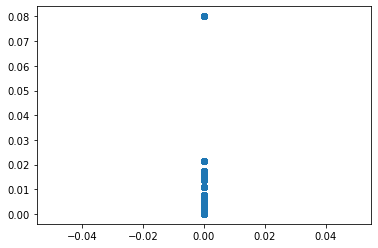

In [235]:
plt.scatter(ds.proba_cohort_given_ip, ds.endpoint_proba)

In [236]:
#fail

In [237]:
df

,time,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,accessed_after,program_name
date,,,,,,,,,,,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,1,Full Stack PHP
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,1,Full Stack PHP
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,1,Full Stack PHP
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,1,Full Stack PHP
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2,0,Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2,1,Web Development
2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2,1,Web Development
2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2,1,Web Development


In [249]:
pages = df['endpoint'].groupby['cohort_id'].count()
pages.head()

TypeError: 'method' object is not subscriptable

In [239]:
# set the window span
span = 30

# compute midband
midband = pages.ewm(span=span).mean()

midband.head()

date
2018-01-26    531.000000
2018-01-27    375.483333
2018-01-28    301.661977
2018-01-29    434.288143
2018-01-30    474.949417
Freq: D, Name: endpoint, dtype: float64

In [240]:
stdev = pages.ewm(span=span).std()

stdev.head()

date
2018-01-26           NaN
2018-01-27    212.839141
2018-01-28    191.619038
2018-01-29    292.288527
2018-01-30    262.535782
Freq: D, Name: endpoint, dtype: float64

In [241]:
ub = midband + stdev*3
lb = midband - stdev*3
ub

date
2018-01-26            NaN
2018-01-27    1014.000757
2018-01-28     876.519090
2018-01-29    1311.153723
2018-01-30    1262.556763
                 ...     
2021-04-17    3522.236814
2021-04-18    3463.461131
2021-04-19    3548.568446
2021-04-20    3560.003304
2021-04-21    3480.013927
Freq: D, Name: endpoint, Length: 1182, dtype: float64

In [242]:
lb

date
2018-01-26           NaN
2018-01-27   -263.034090
2018-01-28   -273.195136
2018-01-29   -442.577438
2018-01-30   -312.657929
                 ...    
2021-04-17   -905.996452
2021-04-18   -932.397567
2021-04-19   -903.767047
2021-04-20   -838.221350
2021-04-21   -791.637261
Freq: D, Name: endpoint, Length: 1182, dtype: float64

In [243]:
bb = pd.concat([ub, lb], axis=1)

bb.columns = ['ub', 'lb']
bb.head()

,ub,lb
date,,
2018-01-26,NaN,NaN
2018-01-27,1014.000757,-263.034090
2018-01-28,876.519090,-273.195136
2018-01-29,1311.153723,-442.577438
2018-01-30,1262.556763,-312.657929


In [244]:
my_df = pd.concat([pages, midband, bb], axis=1)
my_df.columns = ['pages', 'midband', 'ub', 'lb']
my_df.head()

,pages,midband,ub,lb
date,,,,
2018-01-26,531,531.000000,NaN,NaN
2018-01-27,230,375.483333,1014.000757,-263.034090
2018-01-28,168,301.661977,876.519090,-273.195136
2018-01-29,783,434.288143,1311.153723,-442.577438
2018-01-30,613,474.949417,1262.556763,-312.657929


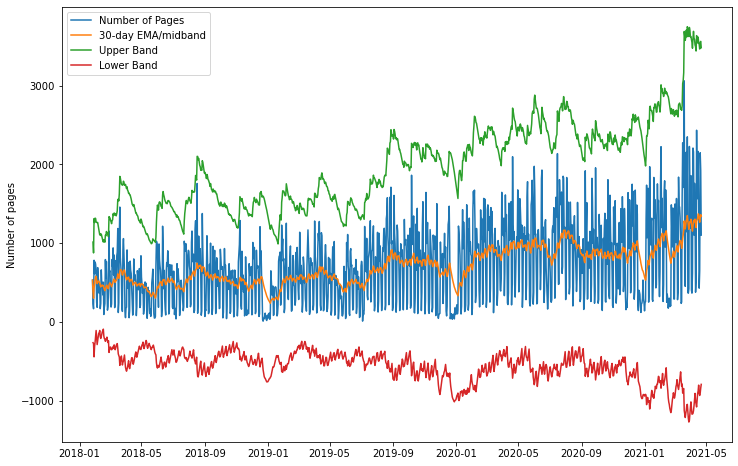

In [245]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(my_df.index, my_df.pages, label='Number of Pages')

ax.plot(my_df.index, my_df.midband, label = '30-day EMA/midband')
ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
ax.plot(my_df.index, my_df.lb, label = 'Lower Band')

ax.legend(loc='best')
ax.set_ylabel('Number of pages')

plt.show()

 # Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [263]:
df_current = df.loc[df.accessed_after ==0]

In [264]:
df_current

,time,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,accessed_after,program_name
date,,,,,,,,,,,,,,,
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2,0,Web Development
2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2,0,Web Development
2018-01-26,09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2,0,Web Development
2018-01-26,09:56:48,javascript-i/functions,3,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2,0,Web Development
2018-01-26,09:56:59,javascript-i/loops,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2,0,Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,16:36:09,jquery/personal-site,869,135.0,136.50.98.51,Marco,#marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,NaN,2,0,Web Development
2021-04-21,16:36:34,html-css/css-ii/bootstrap-grid-system,948,138.0,104.48.214.211,Neptune,#neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,NaN,2,0,Web Development
2021-04-21,16:37:48,java-iii,834,134.0,67.11.50.23,Luna,#luna,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,NaN,2,0,Web Development


In [279]:
df_current = df_current.loc[(df_current.index >= df_current.start_date) & (df_current.index <= df_current.end_date)]

In [280]:
df_current

,time,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,accessed_after,program_name
date,,,,,,,,,,,,,,,
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2,0,Web Development
2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2,0,Web Development
2018-01-26,09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2,0,Web Development
2018-01-26,09:56:48,javascript-i/functions,3,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2,0,Web Development
2018-01-26,09:56:59,javascript-i/loops,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2,0,Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,16:36:09,jquery/personal-site,869,135.0,136.50.98.51,Marco,#marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,NaN,2,0,Web Development
2021-04-21,16:36:34,html-css/css-ii/bootstrap-grid-system,948,138.0,104.48.214.211,Neptune,#neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,NaN,2,0,Web Development
2021-04-21,16:37:48,java-iii,834,134.0,67.11.50.23,Luna,#luna,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,NaN,2,0,Web Development


all entries under accessed_after with a value of 0 were accessed between their start and end time. No befores

In [281]:
#estas bien
df_current.accessed_after.value_counts()

0    644605
Name: accessed_after, dtype: int64

In [294]:
user_df = pd.DataFrame(df_current.user_id.value_counts(dropna=False)).reset_index().\
                rename(index=str, columns={'index': 'user_id', 'user_id': 'user_count'})
user_df2 = pd.DataFrame(df_current.user_id.value_counts(dropna=False)/df_current.user_id.count()).reset_index().\
                rename(index=str, columns={'index': 'user_id', 'user_id': 'user_proba'})
user_df = user_df.merge(user_df2)


# see those where rate < 1% 
user_df[user_df.user_proba < .01]

,user_id,user_count,user_proba
0,344,4773,0.007405
1,570,3274,0.005079
2,685,3193,0.004953
3,671,3091,0.004795
4,555,3081,0.004780
...,...,...,...
726,832,3,0.000005
727,619,1,0.000002
728,940,1,0.000002
729,918,1,0.000002


3632
                  ip  ip_count  ip_proba
3622   172.58.96.115         1  0.000002
3623   174.207.2.195         1  0.000002
3624  107.77.218.154         1  0.000002
3625   172.56.14.207         1  0.000002
3626   172.58.96.108         1  0.000002
3627   107.77.221.14         1  0.000002
3628    67.166.11.44         1  0.000002
3629   154.3.251.184         1  0.000002
3630   165.91.12.128         1  0.000002
3631  172.58.102.250         1  0.000002


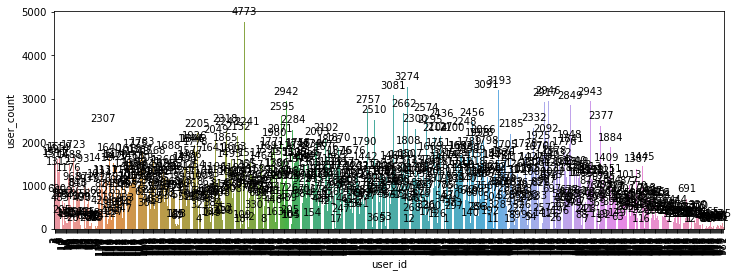

In [318]:


plt.figure(figsize=(12, 4))
splot = sns.barplot(data=df_current, x = 'user_id', y = 'user_count', ci = None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), 
                   textcoords = 'offset points'
                   )
    plt.xticks(rotation='vertical')

In [295]:
df_current = df_current.reset_index().merge(user_df, on=['user_id'], how='left').fillna(value=0).set_index('date')
df_current.user_proba.value_counts()

0.007405    4773
0.002214    4281
0.002709    3492
0.001753    3390
0.002600    3352
            ... 
0.000009       6
0.000008       5
0.000006       4
0.000002       4
0.000005       3
Name: user_proba, Length: 614, dtype: int64

In [302]:
user_access = pd.DataFrame(df_current.user_id.value_counts())

In [307]:
user_access.index.rename('user_id')

Int64Index([344, 570, 685, 671, 555, 764, 823, 423, 760, 794,
            ...
            388, 812, 956, 539, 278, 832, 619, 940, 918, 879],
           dtype='int64', name='user_id', length=731)

In [311]:
user_access = user_access.rename(columns={'user_id':'user_count'})

In [312]:
user_access

,user_count
344,4773
570,3274
685,3193
671,3091
555,3081
...,...
832,3
619,1
940,1
918,1


In [321]:
df_current[df_current.user_count < 50]

,time,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,accessed_after,program_name,ip_count,ip_proba,user_count,user_proba
date,,,,,,,,,,,,,,,,,,,
2018-01-26,11:24:17,appendix,24,21.0,97.105.19.61,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,0.0,2,0,Web Development,51993,0.080659,26,0.000040
2018-01-26,11:24:29,appendix/capstone-workbook,24,21.0,97.105.19.61,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,0.0,2,0,Web Development,51993,0.080659,26,0.000040
2018-01-26,13:58:07,spring/extra-features/file-upload,41,21.0,97.105.19.61,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,0.0,2,0,Web Development,51993,0.080659,28,0.000043
2018-01-26,16:53:53,spring,49,21.0,97.105.19.61,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,0.0,2,0,Web Development,51993,0.080659,25,0.000039
2018-01-26,16:53:54,spring/fundamentals/controllers,49,21.0,97.105.19.61,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,0.0,2,0,Web Development,51993,0.080659,25,0.000039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,10:25:09,/,976,139.0,72.26.31.59,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,0.0,2,0,Web Development,29,0.000045,29,0.000045
2021-04-21,10:26:14,javascript-i/introduction/variables,973,139.0,70.123.219.174,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,0.0,2,0,Web Development,35,0.000054,35,0.000054
2021-04-21,10:42:27,javascript-i/introduction/operators,972,139.0,97.117.115.55,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,0.0,2,0,Web Development,34,0.000053,34,0.000053


working hard or 

In [328]:
hardly_working = df_current[df_current.user_count < 50]

In [329]:
hardly_working

,time,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,accessed_after,program_name,ip_count,ip_proba,user_count,user_proba
date,,,,,,,,,,,,,,,,,,,
2018-01-26,11:24:17,appendix,24,21.0,97.105.19.61,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,0.0,2,0,Web Development,51993,0.080659,26,0.000040
2018-01-26,11:24:29,appendix/capstone-workbook,24,21.0,97.105.19.61,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,0.0,2,0,Web Development,51993,0.080659,26,0.000040
2018-01-26,13:58:07,spring/extra-features/file-upload,41,21.0,97.105.19.61,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,0.0,2,0,Web Development,51993,0.080659,28,0.000043
2018-01-26,16:53:53,spring,49,21.0,97.105.19.61,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,0.0,2,0,Web Development,51993,0.080659,25,0.000039
2018-01-26,16:53:54,spring/fundamentals/controllers,49,21.0,97.105.19.61,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,0.0,2,0,Web Development,51993,0.080659,25,0.000039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,10:25:09,/,976,139.0,72.26.31.59,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,0.0,2,0,Web Development,29,0.000045,29,0.000045
2021-04-21,10:26:14,javascript-i/introduction/variables,973,139.0,70.123.219.174,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,0.0,2,0,Web Development,35,0.000054,35,0.000054
2021-04-21,10:42:27,javascript-i/introduction/operators,972,139.0,97.117.115.55,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,0.0,2,0,Web Development,34,0.000053,34,0.000053


In [330]:
hardly_working.cohort.value_counts()

Oberon       376
Sequoia       79
Europa        66
Neptune       55
Yosemite      42
Jupiter       29
Darden        24
Zion          18
Marco         17
Bayes         17
Fortuna       12
Andromeda      8
Hyperion       7
Voyageurs      4
Ganymede       1
Name: cohort, dtype: int64

In [331]:
hardly_working.program_name.value_counts()

Web Development    714
Data Science        41
Name: program_name, dtype: int64

In [332]:
hardly_working.start_date.value_counts()

2021-04-12    376
2017-09-27     79
2019-11-04     66
2021-03-15     55
2018-11-05     42
2020-09-21     29
2020-07-13     24
2019-01-22     18
2021-01-25     17
2019-08-19     17
2020-01-13     12
2019-03-18      8
2020-05-26      7
2018-05-29      4
2020-03-23      1
Name: start_date, dtype: int64

In [333]:
hardly_working.end_date.value_counts()

2021-10-01    376
2018-02-15     79
2020-04-17     66
2021-09-03     55
2019-04-03     42
2021-03-30     29
2021-01-12     24
2019-06-04     18
2021-07-19     17
2020-01-30     17
2020-06-23     12
2019-07-30      8
2020-11-10      7
2018-10-11      4
2020-08-20      1
Name: end_date, dtype: int64

In [357]:
hardly_info = hardly_working[['user_id','cohort','program_name','start_date','end_date']]

In [368]:
hardly_info = hardly_info.reset_index()

In [371]:
hardly_info.columns

Index(['date', 'user_id', 'cohort', 'program_name', 'start_date', 'end_date'], dtype='object')

In [375]:
hardly_info = hardly_info.drop(columns=['date'])

In [379]:
hardly_info = hardly_info.drop_duplicates(subset='user_id', keep="first")
hardly_info

,user_id,cohort,program_name,start_date,end_date
0,24,Sequoia,Web Development,2017-09-27,2018-02-15
2,41,Sequoia,Web Development,2017-09-27,2018-02-15
3,49,Sequoia,Web Development,2017-09-27,2018-02-15
79,278,Voyageurs,Web Development,2018-05-29,2018-10-11
83,340,Zion,Web Development,2019-01-22,2019-06-04
101,371,Yosemite,Web Development,2018-11-05,2019-04-03
131,388,Andromeda,Web Development,2019-03-18,2019-07-30
151,487,Bayes,Data Science,2019-08-19,2020-01-30
168,529,Europa,Web Development,2019-11-04,2020-04-17
169,539,Europa,Web Development,2019-11-04,2020-04-17


In [380]:
hardly_info.program_name.value_counts()

Web Development    33
Data Science        3
Name: program_name, dtype: int64

### I calculated hardly-accessed-curriculum students to be those who accessed it less than 50 times during their active class dates.

The only two programs who had people that met this criteria was Web Development, and Data Science.
What I'm noticing is:
 - majority of these students belong to web development cohorts
 - 3 cohorts in this list had not graduated by the time this dataset stopped collecting entries
 - 

In [337]:
df_current[df_current.program_name == 'Data Science'].count().mean()

91436.0

In [338]:
df_current[df_current.program_name == 'Web Development'].count().mean()

553169.0

In [345]:
hardly_working[hardly_working.program_name =='Data Science'].count().mean() / (df_current[df_current.program_name == 'Data Science'].count().mean())*100

0.04484010674132727

In [346]:
hardly_working[hardly_working.program_name == 'Web Development'].count().mean() / (df_current[df_current.program_name == 'Web Development'].count().mean())*100

0.12907447814320758